# Library

In [33]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

# Modeling
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Import Data

In [2]:
train = pd.read_csv('clean_train.csv')
# test = pd.read_csv('clean_test.csv')

In [3]:
train

Unnamed: 0  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                0      100002             0          202500.0    406597.5   
1                1      100003             0          270000.0   1293502.5   
2                2      100004             0           67500.0    135000.0   
3                3      100006             0          135000.0    312682.5   
4                4      100007             0          121500.0    513000.0   
...            ...         ...           ...               ...         ...   
307506      307506      456251             0          157500.0    254700.0   
307507      307507      456252             0           72000.0    269550.0   
307508      307508      456253             0          153000.0    677664.0   
307509      307509      456254             0          171000.0    370107.0   
307510      307510      456255             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  p_app_DAYS_LAST_DUE_count  \
0              -637.0  ...                        1.0   
1             -1188.0  ...                        3.0   
2              -225.0  ...                        1.0   
3             -3039.0  ...                        4.0   
4             -3038.0  ...                        5.0   
...               ...  ...                        ...   
307506         -236.0  ...                        1.0   
307507            NaN  ...                        1.0   
307508        -7921.0  ...                        2.0   
307509        -4786.0  ...                        2.0   
307510        -1262.0  ...                        6.0   

        p_app_DAYS_LAST_DUE_mean  p_app_DAYS_LAST_DUE_sum  \
0                     -25.000000                    -25.0   
1                   -1054.333333                  -3163.0   
2                    -724.000000                   -724.0   
3                  182477.500000                 729910.0   
4                   72136.200000                 360681.0   
...                          ...                      ...   
307506                -30.000000                    -30.0   
307507              -2316.000000                  -2316.0   
307508              -2219.000000                  -4438.0   
307509             365243.000000                 730486.0   
307510               -358.333333                  -2150.0   

        p_app_DAYS_TERMINATION_count  p_app_DAYS_TERMINATION_mean  \
0                                1.0                   -17.000000   
1                                3.0                 -1047.333333   
2                                1.0                  -714.000000   
3                                4.0                182481.750000   
4                                5.0                 72143.800000   
...                              ...                          ...   
307506                           1.0                   -25.000000   
307507                           1.0                 -2311.000000   
307508                           2.0                 -2212.500000   
30

# Pre-Processing

## Missing Values

In [3]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
miss = pd.concat([total, percent], axis=1, keys=['Total', 'Persentase'])
miss

Total  Persentase
LANDAREA_MEDI                       182590   59.376738
LANDAREA_MODE                       182590   59.376738
LANDAREA_AVG                        182590   59.376738
BASEMENTAREA_MEDI                   179943   58.515956
BASEMENTAREA_AVG                    179943   58.515956
...                                    ...         ...
ORGANIZATION_TYPE_Industry: type 1       0    0.000000
ORGANIZATION_TYPE_Housing                0    0.000000
ORGANIZATION_TYPE_Hotel                  0    0.000000
ORGANIZATION_TYPE_Government             0    0.000000
TARGET                                   0    0.000000

[618 rows x 2 columns]

### Handling Missing Values

In [4]:
# Find index of columns with missing values more than 57%
del_miss = (miss[miss['Persentase'] >= 57]).index.tolist()
indeks = [train.columns.get_loc(col) for col in del_miss]
indeks.sort()

In [5]:
df_train = train.drop(train.columns[indeks], axis=1)
df_train

Unnamed: 0  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                0      100002             0          202500.0    406597.5   
1                1      100003             0          270000.0   1293502.5   
2                2      100004             0           67500.0    135000.0   
3                3      100006             0          135000.0    312682.5   
4                4      100007             0          121500.0    513000.0   
...            ...         ...           ...               ...         ...   
307506      307506      456251             0          157500.0    254700.0   
307507      307507      456252             0           72000.0    269550.0   
307508      307508      456253             0          153000.0    677664.0   
307509      307509      456254             0          171000.0    370107.0   
307510      307510      456255             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  p_app_DAYS_LAST_DUE_count  \
0              -637.0  ...                        1.0   
1             -1188.0  ...                        3.0   
2              -225.0  ...                        1.0   
3             -3039.0  ...                        4.0   
4             -3038.0  ...                        5.0   
...               ...  ...                        ...   
307506         -236.0  ...                        1.0   
307507            NaN  ...                        1.0   
307508        -7921.0  ...                        2.0   
307509        -4786.0  ...                        2.0   
307510        -1262.0  ...                        6.0   

        p_app_DAYS_LAST_DUE_mean  p_app_DAYS_LAST_DUE_sum  \
0                     -25.000000                    -25.0   
1                   -1054.333333                  -3163.0   
2                    -724.000000                   -724.0   
3                  182477.500000                 729910.0   
4                   72136.200000                 360681.0   
...                          ...                      ...   
307506                -30.000000                    -30.0   
307507              -2316.000000                  -2316.0   
307508              -2219.000000                  -4438.0   
307509             365243.000000                 730486.0   
307510               -358.333333                  -2150.0   

        p_app_DAYS_TERMINATION_count  p_app_DAYS_TERMINATION_mean  \
0                                1.0                   -17.000000   
1                                3.0                 -1047.333333   
2                                1.0                  -714.000000   
3                                4.0                182481.750000   
4                                5.0                 72143.800000   
...                              ...                          ...   
307506                           1.0                   -25.000000   
307507                           1.0                 -2311.000000   
307508                           2.0                 -2212.500000   
30

In [6]:
# Menghapus kolom ID
df_train = df_train.drop(train.columns[0: 2], axis=1)

## Duplicate Data

In [67]:
duplicated = train.duplicated().sum()
if duplicated:
  print('Duplicate rows are: {}'.format(duplicated))
else:
  print('There is no duplicate values')

There is no duplicate values


## Data Imbalance

In [66]:
# Plotting pie chart for train['TARGET]
fig = px.pie(train, names='TARGET', title='TARGET')
fig.show()

### Split Dataset to X & y

In [7]:
X = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

# Feature Engineering

## Feature Selection

### LightGBM

In [8]:
# To make column names more friendly (without space)
X.columns = [''.join (c if c.isalnum() else '_' for c in str(x)) for x in X.columns]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.347972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40264
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 604
[LightGBM] [Info] Start training from score 0.080729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

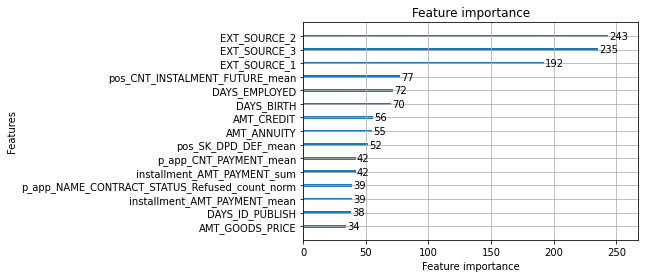

In [9]:
# build a LightGBM model to select important features
# running this line of code will take a lot of computer resources
light_train = lgb.Dataset(X, label=y)
param = {'max_depth': 5, 'learning_rate' : 0.1, 'num_leaves': 900, 'n_estimators': 100}
model = lgb.train(params=param, train_set=light_train)
ax = lgb.plot_importance(model, max_num_features=15)
plt.show()

In [10]:
feature_important_thredhold = 7
feature_important = {model.feature_name()[i]:model.feature_importance()[i]  for i in range(len(model.feature_importance()))}
LGBM_features_columns = [d for d in feature_important if feature_important[d] > feature_important_thredhold]
print(f'There are {len(X[LGBM_features_columns].columns)} important features after LightGBM selection.')

There are 78 important features after LightGBM selection.


### Correlation

In [11]:
correlation_threshold = 0.7

# Calculating an absolute value correlation matrix
corr_mat = X[LGBM_features_columns].corr().abs()

# Getting upper triangle of this matrix only
upper = pd.DataFrame(np.triu(corr_mat, k=1), columns=X[LGBM_features_columns].columns)

# Select columns with correlations above threshold
corr_col_drop = [col for col in upper.columns if any(upper[col] > correlation_threshold)]

print(f'There are {len(corr_col_drop)} columns to remove out of {len(X[LGBM_features_columns].columns)}.')

There are 26 columns to remove out of 78.


In [12]:
# Save the data after feature selection in new variable
train2 = X[LGBM_features_columns].drop(corr_col_drop, axis=1)
train2

AMT_CREDIT  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         406597.5                    0.018801       -9461         -637.0   
1        1293502.5                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         312682.5                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   
...            ...                         ...         ...            ...   
307506    254700.0                    0.032561       -9327         -236.0   
307507    269550.0                    0.025164      -20775            NaN   
307508    677664.0                    0.005002      -14966        -7921.0   
307509    370107.0                    0.005313      -11961        -4786.0   
307510    675000.0                    0.046220      -16856        -1262.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT_W_CITY  \
0                 -3648.0            -2120                            2   
1                 -1186.0             -291                            1   
2                 -4260.0            -2531                            2   
3                 -9833.0            -2437                            2   
4                 -4311.0            -3458                            2   
...                   ...              ...                          ...   
307506            -8456.0            -1982                            1   
307507            -4388.0            -4090                            2   
307508            -6737.0            -5150                            3   
307509            -2562.0             -931                            2   
307510            -5128.0             -410                            1   

        REG_CITY_NOT_LIVE_CITY  EXT_SOURCE_1  EXT_SOURCE_2  ...  \
0                            0      0.083037      0.262949  ...   
1                            0      0.311267      0.622246  ...   
2                            0           NaN      0.555912  ...   
3                            0           NaN      0.650442  ...   
4                            0           NaN      0.322738  ...   
...                        ...           ...           ...  ...   
307506                       0      0.145570      0.681632  ...   
307507                       0           NaN      0.115992  ...   
307508                       0      0.744026      0.535722  ...   
307509                       1           NaN      0.514163  ...   
307510                       0      0.734460      0.708569  ...   

        p_app_PRODUCT_COMBINATION_Cash_Street__low_count_norm  \
0                                                   0.000       
1                                                   0.000       
2                                                   0.000       
3                                                   0.000       
4                                                   0.000       
...                                                   ...       
307506                                              0.000       
307507                                              0.000       
307508                                              0.000       
307509                                              0.000       
307510                                              0.125       

        p_app_PRODUCT_COMBINATION_Cash_X_Sell__high_count_norm  \
0                                                0.000000        
1                                                0.000000        
2                                                0.000000        
3                                                0.111111        
4                                                0.000000        
...                                                   ...        
307506                                           0.000000        
307507                                           0.000000        
30

### Feature Selection with information gain

In [ ]:
# Selecting attributes based on mutual information
'''
selector = SelectKBest(mutual_info_classif, k=20)
selector.fit_transform(train2, np.ravel(y))
cols = selector.get_support(indices=True)
best = train2.iloc[:,cols].columns.tolist()
print(best)
'''

In [ ]:
'''
X_res = X_res[X_res.columns.intersection(best)]
X_res.head()
'''

### Feature Selection with chi2

In [ ]:
'''
kolom_negatif = train2.columns[train2.lt(0).any()].tolist()
kolom = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED_PERCENT']
indeks_kolom = train2.columns.get_indexer(kolom)

print(indeks_kolom)
'''

In [90]:
# Change Negative value to absolute 
'''
train2.iloc[:,2:6] = train2.iloc[:,2:6].abs()
train2.iloc[:,13] = train2.iloc[:,13].abs()
train2.iloc[:,-1] = train2.iloc[:,-1].abs()
'''

In [ ]:
# feature selection
'''
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(train2,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train2.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)
'''

In [ ]:
'''
selection = featureScores.sort_values(by='Score', ascending=False)

# Memilih 50 atribut terbaik dan menyimpannya dalam variabel baru
selected_features = selection.head(25)['Features'].tolist()
selected_features
'''

## Impute Missing Value with Median 

In [13]:
col_numerik = train2.select_dtypes(include=['int64','float64']).columns.tolist()

for column in train2:
    if train2[column].isnull().any():
        if(column in col_numerik):
            train2[column]=train2[column].fillna(train2[column].median())

## Handling Imbalance

In [14]:
# See imbalance data
print(y.value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64


### Random undersample

In [ ]:
'''
undersampler = RandomUnderSampler(sampling_strategy = 1)
X_res, y_res = undersampler.fit_resample(train2, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
'''

### Tomek Links

In [ ]:
'''
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

# Terapkan Tomek Links Undersampling pada data latih
X_res, y_res = tl.fit_resample(train2, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
'''

### NearMiss

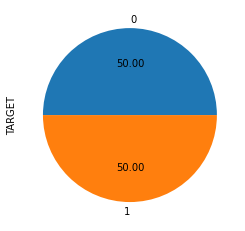

In [15]:
# Undersampling with NearMiss Method
nm = NearMiss()
X_res, y_res = nm.fit_resample(train2, y)

# Pie plot to see the data after undersampling
ax = y_res.value_counts().plot.pie(autopct='%.2f')

In [16]:
# See value counts after undersampling
y_res.value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

# Modelling

In [17]:
# Splitting Data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state=42)

In [18]:
# Scaling Data with RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest

In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, pred_rf))
print('ROCAUC score:',roc_auc_score(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7436
           1       0.92      0.84      0.88      7459

    accuracy                           0.88     14895
   macro avg       0.88      0.88      0.88     14895
weighted avg       0.88      0.88      0.88     14895

ROCAUC score: 0.8808299698383438


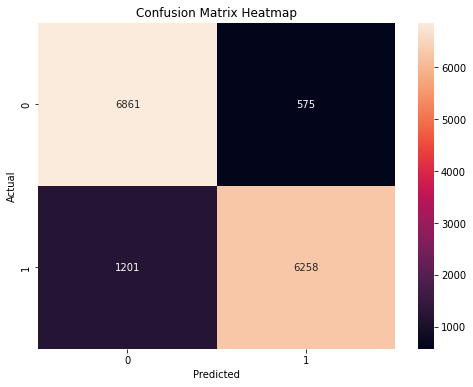

In [59]:
confmatrix = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

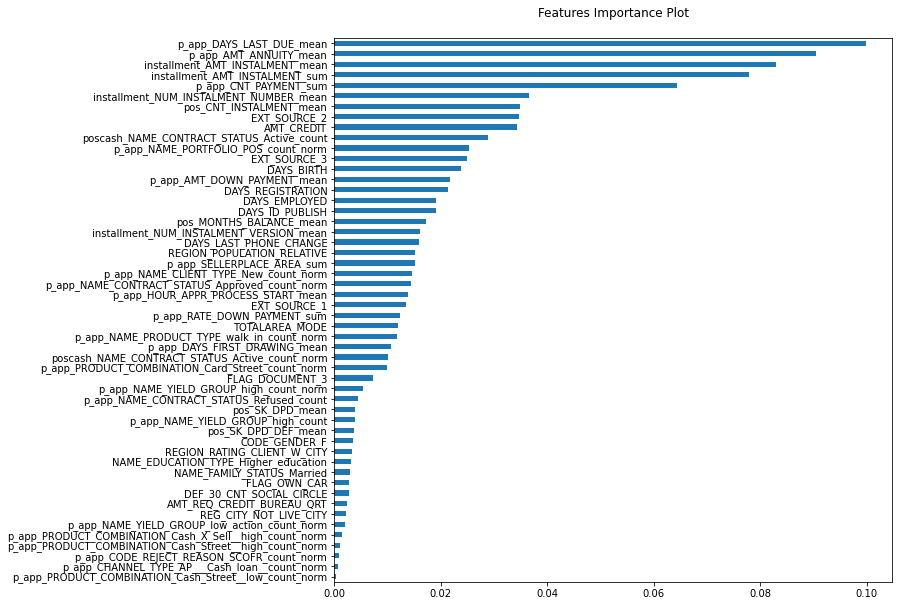

In [20]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=X_res.columns).sort_values(ascending=True)

plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh')
plt.title('Features Importance Plot\n')
plt.show()

### Logistic Regression

In [21]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
pred_log = log_model.predict(X_test)

print(classification_report(y_test, pred_log))
print('ROCAUC score:',roc_auc_score(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      7436
           1       0.86      0.77      0.81      7459

    accuracy                           0.82     14895
   macro avg       0.83      0.82      0.82     14895
weighted avg       0.83      0.82      0.82     14895

ROCAUC score: 0.8227073466923106


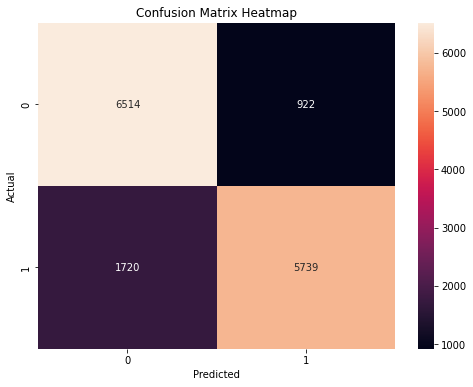

In [60]:
confmatrix = confusion_matrix(y_test, pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### K-Nearest Neighbout

In [31]:
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)
pred_kn = kn_model.predict(X_test)

print(classification_report(y_test, pred_kn))
print('ROCAUC score:',roc_auc_score(y_test, pred_kn))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      7436
           1       0.90      0.74      0.81      7459

    accuracy                           0.83     14895
   macro avg       0.84      0.83      0.83     14895
weighted avg       0.84      0.83      0.83     14895

ROCAUC score: 0.8283339184457607


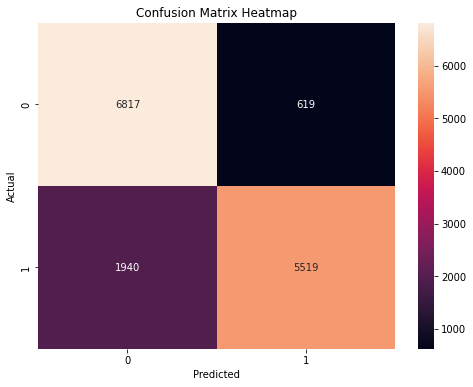

In [61]:
confmatrix = confusion_matrix(y_test, pred_kn)
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### MLP

In [27]:
mlp_model = MLPClassifier(activation='relu', solver='adam', alpha=0.0001, hidden_layer_sizes=(110,), 
                      max_iter=5000, random_state=10)
mlp_model.fit(X_train, y_train)
pred_mlp = mlp_model.predict(X_test)

print(classification_report(y_test, pred_mlp))
print('ROCAUC score:',roc_auc_score(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7436
           1       0.92      0.82      0.87      7459

    accuracy                           0.88     14895
   macro avg       0.88      0.88      0.88     14895
weighted avg       0.88      0.88      0.88     14895

ROCAUC score: 0.8760795342312767


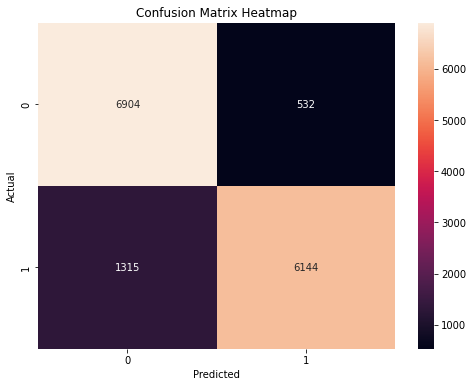

In [62]:
confmatrix = confusion_matrix(y_test, pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Decision Tree

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)

print(classification_report(y_test, pred_dt))
print('ROCAUC score:',roc_auc_score(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7436
           1       0.82      0.82      0.82      7459

    accuracy                           0.82     14895
   macro avg       0.82      0.82      0.82     14895
weighted avg       0.82      0.82      0.82     14895

ROCAUC score: 0.8181908959583323


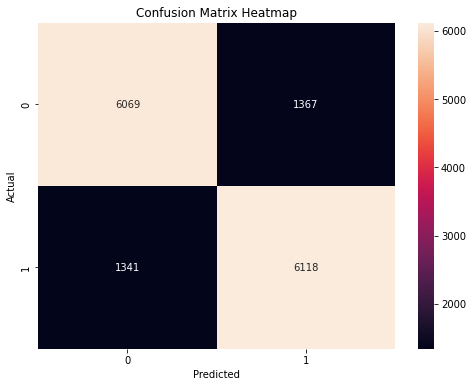

In [63]:
confmatrix = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Extra Tree Classifier

In [25]:
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
pred_etc = etc_model.predict(X_test)

print(classification_report(y_test, pred_etc))
print('ROCAUC score:',roc_auc_score(y_test, pred_etc))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7436
           1       0.91      0.83      0.86      7459

    accuracy                           0.87     14895
   macro avg       0.87      0.87      0.87     14895
weighted avg       0.87      0.87      0.87     14895

ROCAUC score: 0.8701571910305292


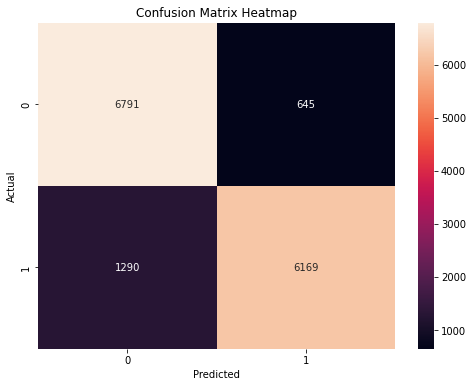

In [64]:
confmatrix = confusion_matrix(y_test, pred_etc)
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Ensemble (Boosting/Bagging)

In [29]:
# Membuat model Decision Tree sebagai model dasar atau base-estimator
base = DecisionTreeClassifier()

bagging = BaggingClassifier(base_estimator=base, n_estimators=100)
# Melakukan Fitting atau Training Data
bagging.fit(X_train, y_train)
pred_bagging = bagging.predict(X_test)

print(classification_report(y_test, pred_bagging))
print('ROCAUC score:',roc_auc_score(y_test, pred_bagging))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7436
           1       0.92      0.84      0.88      7459

    accuracy                           0.88     14895
   macro avg       0.88      0.88      0.88     14895
weighted avg       0.88      0.88      0.88     14895

ROCAUC score: 0.8817736168767962


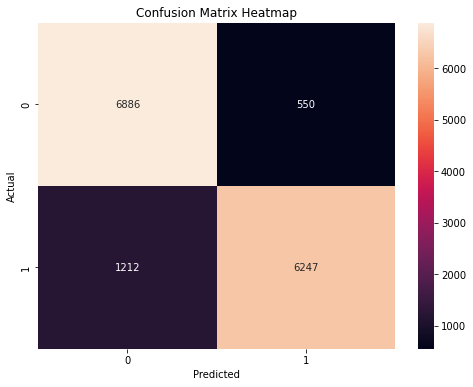

In [65]:
confmatrix = confusion_matrix(y_test, pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## ROC Curve

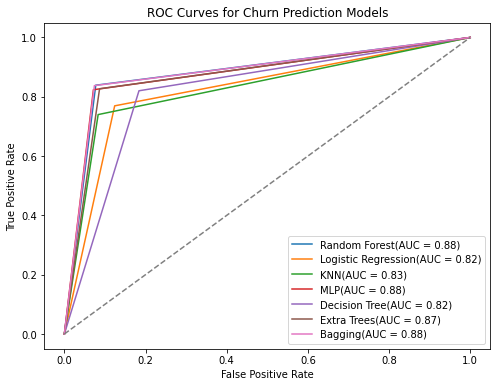

In [58]:
# Buatlah fungsi untuk menampilkan roc curve dari beberapa model
def plot_roc_curve(y_test, preds, name):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curve for each model
    i = 0
    for pred in preds:
        fpr, tpr, _ = roc_curve(y_test, pred)
        auc_score = roc_auc_score(y_test, pred)
        plt.plot(fpr, tpr, label=f'{name[i]}(AUC = {auc_score:.2f})')
        i+=1

    # Plot random guess
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Churn Prediction Models')
    plt.legend()
    plt.show()

preds = [pred_rf, pred_log, pred_kn, pred_mlp, pred_dt, pred_etc, pred_bagging]
name = ['Random Forest', 'Logistic Regression', 'KNN', 'MLP', 'Decision Tree', 'Extra Trees', 'Bagging']

plot_roc_curve(y_test, preds, name)